In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


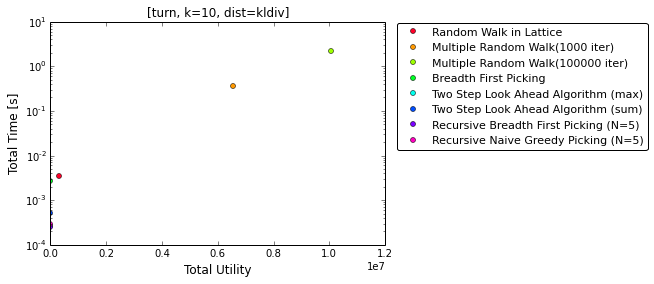

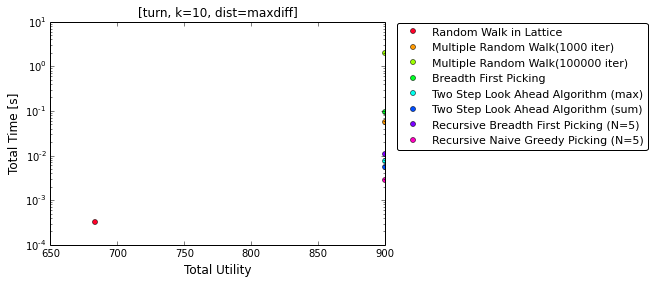

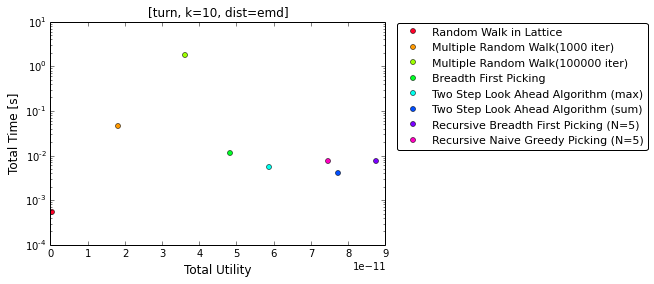

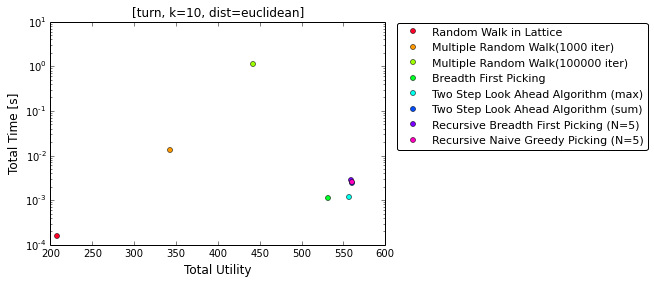

In [33]:
df_all = pd.read_csv("../experiment/output_all_dist.csv")
df_all["total_time"]=df_all["total_time"]/1e9 #ns --> s conversion
dist = "emd"
k=10 
for dist in df_all.dist.unique():
    df  = df_all[df_all["dist"]==dist]
    fig,ax = plt.subplots()
    plt.title("[turn, k={}, dist={}]".format(k,dist))
    color=iter(cm.gist_rainbow(np.linspace(0,1,len(df.algo.unique()))))
    for algo in df_all.algo.unique():
        algo_df = df[df["algo"]==algo]
        plt.semilogy(algo_df["total_utility"],algo_df["total_time"],'o',ms=5,c=next(color),label=algo)
    lgd=plt.legend(numpoints=1, bbox_to_anchor=(1.8, 1.02),fontsize=11,fancybox=True)
    plt.xlabel("Total Utility",fontsize=12)
    plt.ylabel("Total Time [s]",fontsize=12)
    fig.savefig("turn_k{}_{}.pdf".format(k,dist), bbox_extra_artists=(lgd,), bbox_inches='tight')

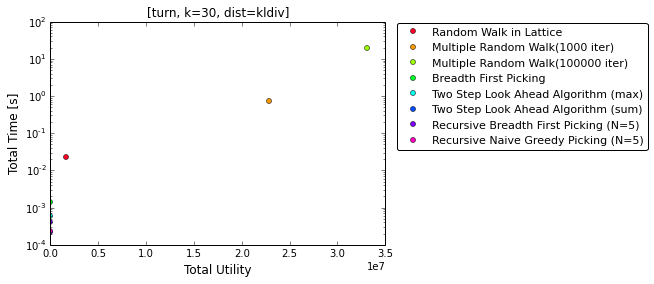

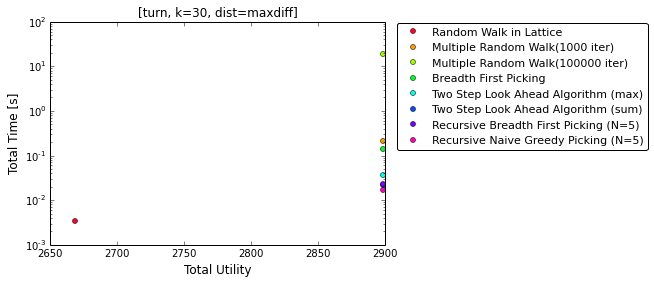

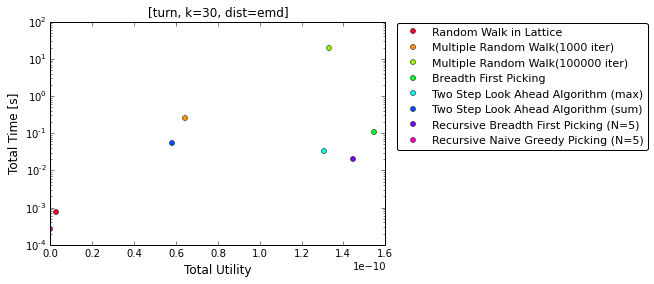

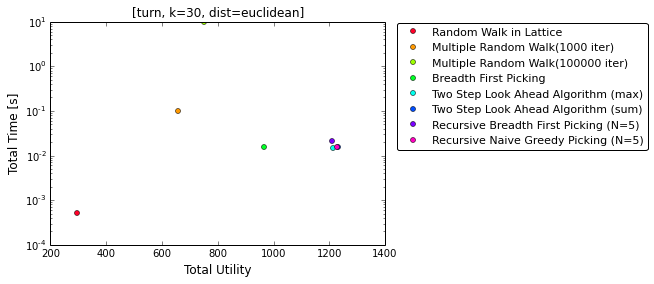

In [35]:
df_all = pd.read_csv("../experiment/output_all_dist_k30.csv")
df_all["total_time"]=df_all["total_time"]/1e9 #ns --> s conversion
k=30 
for dist in df_all.dist.unique():
    df  = df_all[df_all["dist"]==dist]
    fig,ax = plt.subplots()
    plt.title("[turn, k={}, dist={}]".format(k,dist))
    color=iter(cm.gist_rainbow(np.linspace(0,1,len(df.algo.unique()))))
    for algo in df_all.algo.unique():
        algo_df = df[df["algo"]==algo]
        plt.semilogy(algo_df["total_utility"],algo_df["total_time"],'o',ms=5,c=next(color),label=algo)
    lgd=plt.legend(numpoints=1, bbox_to_anchor=(1.8, 1.02),fontsize=11,fancybox=True)
    plt.xlabel("Total Utility",fontsize=12)
    plt.ylabel("Total Time [s]",fontsize=12)
    fig.savefig("turn_k{}_{}.pdf".format(k,dist), bbox_extra_artists=(lgd,), bbox_inches='tight')

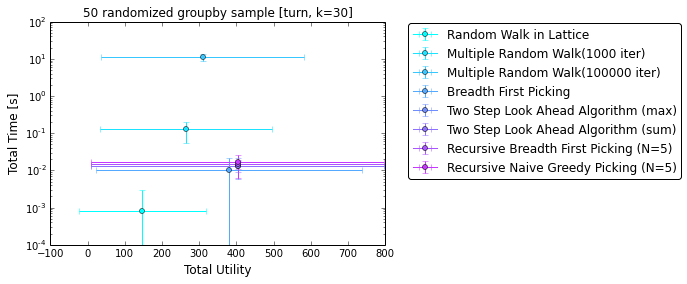

In [102]:
df = pd.read_csv("../experiment/output_randomize50.csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion
avrg = df.groupby("algo",as_index=False).mean()
stdev = df.groupby("algo",as_index=False).apply(std)
avrg["std_time"]=stdev["total_time"]
avrg["std_utility"]=stdev["total_utility"]
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=30]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = avrg[avrg["algo"]==algo]
    plt.errorbar(algo_df["total_utility"],algo_df["total_time"],xerr=algo_df["std_utility"],yerr=algo_df["std_time"],c=next(color),fmt="-o",ms=5,label=algo)
ax.set_yscale("log", nonposy='clip')
plt.legend(numpoints=1, bbox_to_anchor=(1.9, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k10_aggregated.pdf")

In [84]:
df_rank = df.groupby(['xAxis','yAxis','groupby'],as_index=False).rank(axis=0)[['total_time','total_utility']]#.rename(['rank_time','rank_utility'],axis=1)

In [86]:
df_rank.columns=['rank_time','rank_utility']

In [100]:
df.join(df_rank).groupby('algo').mean()[['rank_time','rank_utility']].reset_index().sort('rank_time')

,algo,rank_time,rank_utility
3,Random Walk in Lattice,1.04,1.02
0,Breadth First Picking,2.56,4.94
6,Two Step Look Ahead Algorithm (max),3.78,6.18
7,Two Step Look Ahead Algorithm (sum),4.14,6.32
5,Recursive Naive Greedy Picking (N=5),4.54,6.21
4,Recursive Breadth First Picking (N=5),4.94,6.35
1,Multiple Random Walk(1000 iter),7.00,2.00
2,Multiple Random Walk(100000 iter),8.00,2.98


Notes: 
- Sanity check: 
    - SRW < MRW
    - Look ahead > Frontier Greedy, while not taking too much longer in time.
- KL divergence causes the look ahead algos to go bad --> prob a bug
- max diff yields not a lot variation in terms of different algo
    